# Análisis de sentimientos

In [1]:
# importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alejandro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alejandro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# cargando el dataset
df = pd.read_csv('twitter.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
print(f'Este dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas')

Este dataframe contiene 24783 filas y 7 columnas


In [4]:
# funcion para quitar caracteres especiales
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["tweet"] = df["tweet"].apply(clean)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...


In [5]:
# quitando las dos primeras palabras de la columna tweet
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.split()[2:]))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,woman shouldnt complain clean hous amp man alw...
1,1,3,0,3,0,1,dat coldtyga dwn bad cuffin dat hoe place
2,2,3,0,3,0,1,dawg rt ever fuck bitch start cri confus shit
3,3,3,0,2,1,1,vivabas look like tranni
4,4,6,0,6,0,1,shit hear might true might faker bitch told ya


In [6]:
# calculando la puntuacion de sentimientos
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]

In [7]:
# reformando el dataframe
df = df[["tweet", "Positive", "Negative", "Neutral"]]
df.head()

,tweet,Positive,Negative,Neutral
0,woman shouldnt complain clean hous amp man alw...,0.171,0.183,0.647
1,dat coldtyga dwn bad cuffin dat hoe place,0.000,0.333,0.667
2,dawg rt ever fuck bitch start cri confus shit,0.000,0.645,0.355
3,vivabas look like tranni,0.455,0.000,0.545
4,shit hear might true might faker bitch told ya,0.173,0.457,0.370


In [8]:
# creando columna con el sentimiento más alto
df['Sentiment'] = df[['Positive', 'Negative', 'Neutral']].idxmax(axis=1)
df.head()

,tweet,Positive,Negative,Neutral,Sentiment
0,woman shouldnt complain clean hous amp man alw...,0.171,0.183,0.647,Neutral
1,dat coldtyga dwn bad cuffin dat hoe place,0.000,0.333,0.667,Neutral
2,dawg rt ever fuck bitch start cri confus shit,0.000,0.645,0.355,Negative
3,vivabas look like tranni,0.455,0.000,0.545,Neutral
4,shit hear might true might faker bitch told ya,0.173,0.457,0.370,Negative


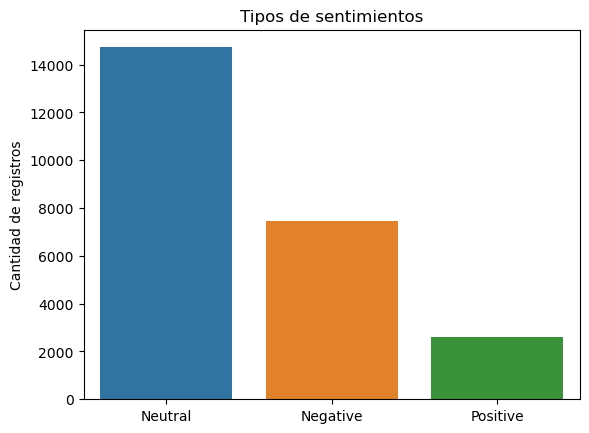

In [9]:
# visualizando las categorias de los sentimientos
sns.countplot(x=df["Sentiment"])
plt.title("Tipos de sentimientos")
plt.xlabel("")
plt.ylabel("Cantidad de registros")
plt.show()